# 🧬 Análisis de Datos – Diagnóstico Médico (*Breast Cancer Wisconsin*)

Este notebook presenta un análisis del dataset `Breast Cancer`, con foco en la **limpieza**, **transformación** y **análisis exploratorio de datos (EDA)**. Además, se responde una serie de preguntas orientadas a comprender mejor las características que distinguen a los tumores benignos y malignos.

## 🎯 Objetivo

El objetivo de este notebook es **preparar y explorar el dataset de cáncer de mama** para dejarlo en condiciones óptimas para análisis posteriores. Esto incluye:

- Realizar una limpieza básica de los datos.
- Detectar y tratar valores nulos o irrelevantes.
- Comprender la distribución de las variables.
- Guiar el análisis mediante preguntas exploratorias enfocadas en entender las diferencias entre tumores benignos y malignos.

In [ ]:
# Instalación de kagglehub, si no está instalado
%pip install kagglehub

In [1]:
# Importación de librerías
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
pd.options.display.max_columns = None

In [2]:
# Carga y muestra del dataset 
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
df = pd.read_csv(f"{path}/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Alternativa local (opcional, si no se desea descargar desde kagglehub)
# df = pd.read_csv('data-breastcancer.csv')

## 🔍 Exploración Inicial

In [3]:
# Tamaño del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 569, Columnas: 33


In [4]:
# Información general de columnas y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Estadísticas básicas de columnas numéricas
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## ❌ Revisión de valores faltantes

In [6]:
valores_faltantes = df.isnull().sum()
valores_faltantes[valores_faltantes > 0]

Unnamed: 32    569
dtype: int64

> **Acción tomada**: Eliminar columnas con muchos nulos o sin valor informativo.

In [7]:
df.drop(columns=["Unnamed: 32", "id"], inplace=True)

## 🧠 Transformación de Datos

In [8]:
df['target'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.drop(columns='diagnosis', inplace=True)

> **Nota**: Se renombró la columna diagnosis a target y se codificó como binaria (0 = Benigno, 1 = Maligno) para facilitar análisis posteriores de modelos predictivos.

## 📊 Análisis Exploratorio de Datos (EDA)

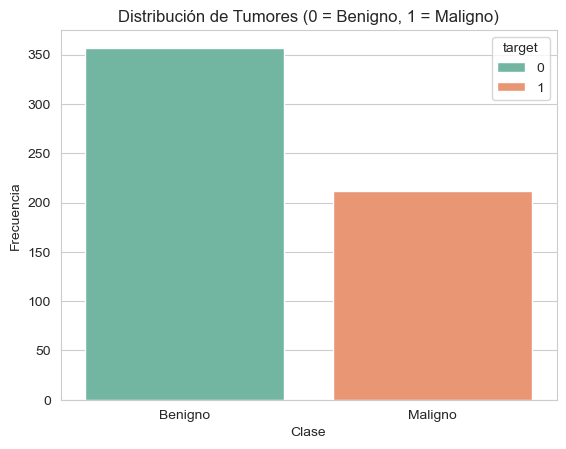

In [9]:
# Visualización de la distribución de clases
sns.countplot(data=df, x='target', palette='Set2', hue='target')
plt.title('Distribución de Tumores (0 = Benigno, 1 = Maligno)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['Benigno', 'Maligno'])
plt.show()

> La distribución de las clases muestra que la mayoría de los tumores en el dataset son benignos, con un 62.7% de tumores benignos y un 37.3% malignos. Esto indica un leve desbalance de clases, dado que no es tan significativo, no se considera necesario aplicar algún tipo de generador de datos sintéticos a futuro. 

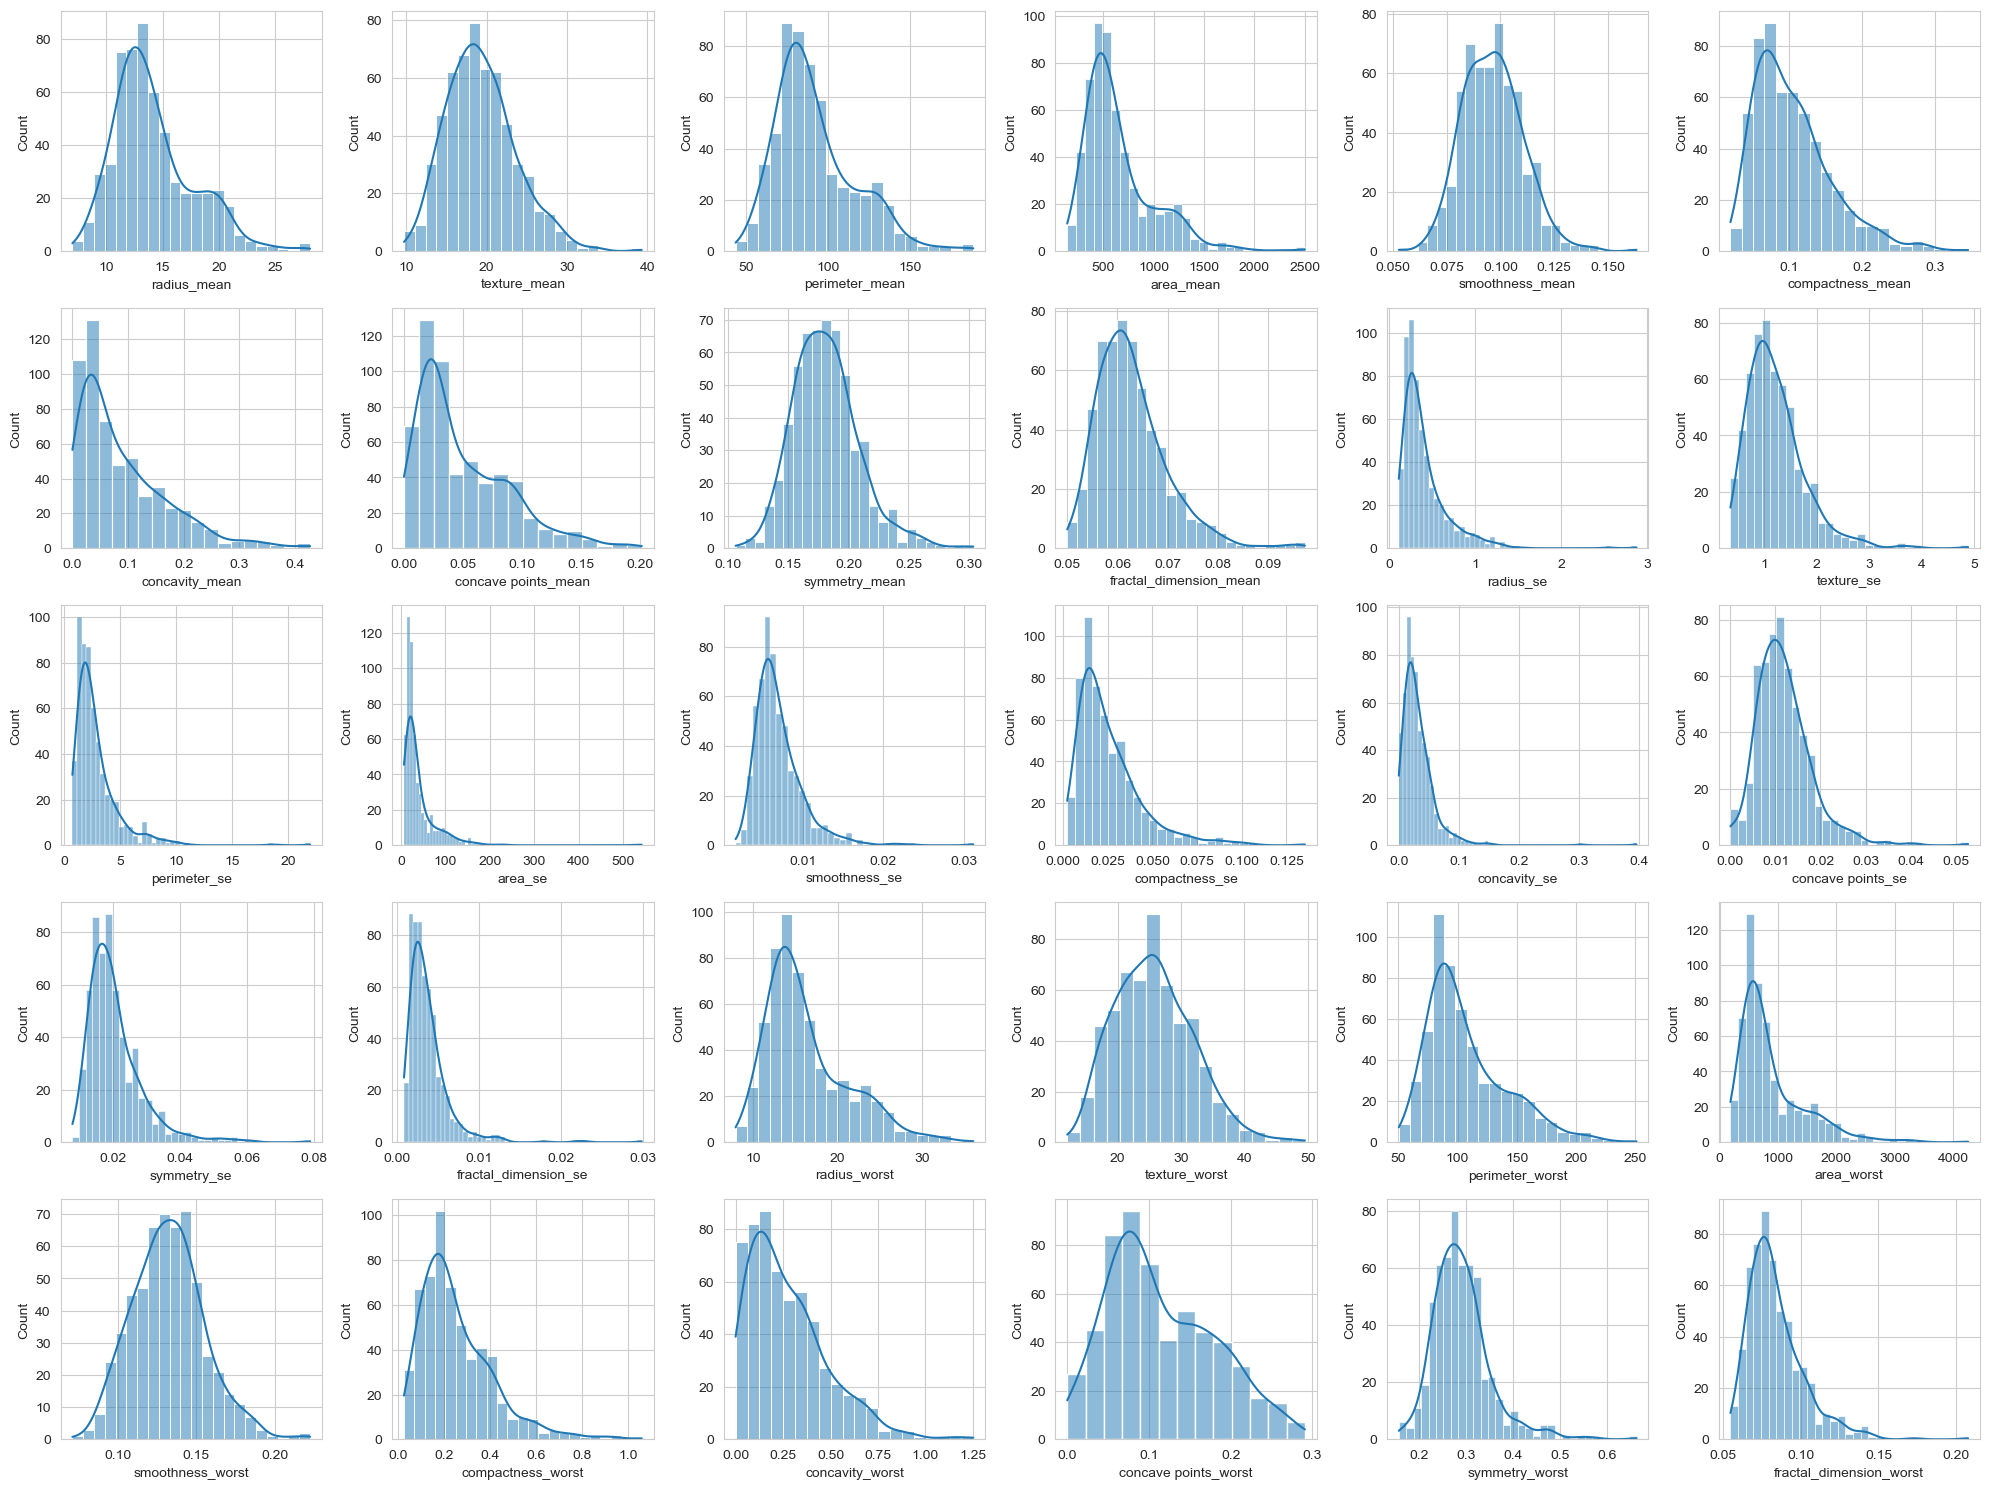

In [10]:
# Visualización de distribuciones individuales
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df.drop(columns='target'):
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

- **Sesgo a la derecha**: La mayoría de las variables, especialmente las relacionadas con el tamaño del tumor como `radius_mean`, `perimeter_mean`, `area_mean`, `radius_worst`, `area_worst` y `perimeter_worst`, presentan distribuciones con un sesgo a la derecha. Esto indica que los tumores suelen ser pequeños en la mayoría de los casos, pero existen algunos tumores significativamente más grandes (outliers).

- **Variables más simétricas**: Características como `smoothness_mean`, `symmetry_mean` y `fractal_dimension_mean` muestran distribuciones más centradas y simétricas. Esto sugiere que estas propiedades del tumor varían menos entre muestras, lo que puede indicar mayor consistencia biológica.

- **Outliers evidentes**: En algunas variables como `area_worst`, `concavity_worst` o `compactness_worst`, se observan valores extremos que podrían influir en los análisis posteriores. Estos outliers podrían representar tumores atípicos o más agresivos.

- **Diferencias entre versiones "_mean", "_se" y "_worst"**: Las variables con sufijos `_se` (error estándar) tienden a tener distribuciones más concentradas cerca de cero, lo cual es esperable, ya que representan variaciones sobre las medias. Por otro lado, las variables `_worst` tienden a seguir patrones similares a las `_mean` pero con colas más largas, lo que indica mayor dispersión en los valores extremos.

> Este análisis es útil para identificar transformaciones necesarias (como normalización o escalado), detectar posibles outliers, y entender qué variables podrían aportar mayor información a un modelo predictivo posterior.

## ❓ Análisis Dirigido por Preguntas

### 1. ¿Cuál es el promedio del radio del tumor por tipo?

In [11]:
df.groupby('target')['radius_mean'].mean()

target
0    12.146524
1    17.462830
Name: radius_mean, dtype: float64

> Los tumores malignos tienen un radio promedio significativamente mayor (≈ 17.46) que los tumores benignos (≈ 12.15). Esto sugiere que el tamaño del tumor, representado por el radio, es una característica relevante para diferenciar entre tumores benignos y malignos.

### 2. ¿Cómo varía la textura media entre tumores benignos y malignos?

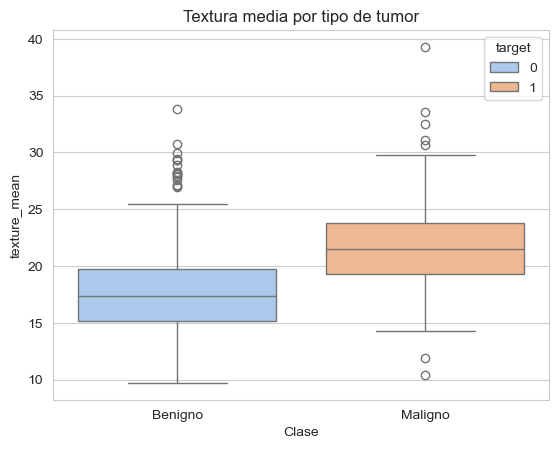

In [12]:
sns.boxplot(data=df, x='target', y='texture_mean', hue='target', palette='pastel')
plt.title('Textura media por tipo de tumor')
plt.xlabel('Clase')
plt.xticks([0, 1], ['Benigno', 'Maligno'])
plt.show()

> La textura media tiende a ser más alta en los tumores malignos en comparación con los benignos, con una mayor dispersión en los valores. Esta variabilidad sugiere que la textura también podría ser un factor discriminante entre los dos tipos de tumor, aunque los valores de dispersión en los tumores malignos son mayores.

### 3. ¿Qué variables están más correlacionadas con el diagnóstico?

In [13]:
cor_target = df.corr()['target'].abs().sort_values(ascending=False)
cor_target.head(10)

target                  1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: target, dtype: float64

> Estas variables parecen tener una fuerte relación con el diagnóstico, especialmente las relacionadas con la forma y el tamaño del tumor. Esto sugiere que características geométricas del tumor como su perímetro, área y puntos cóncavos son cruciales para distinguir entre tumores benignos y malignos.